<a href="https://colab.research.google.com/github/bptripp/ai-course/blob/main/heart_disease_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Decision Trees to Predict Heart Disease
Does the patient before you have coronary artery disease? He is 63 years old. A recent blood pressure was 145/90mmHg. His serum cholesterol is borderline, and fasting blood sugar is in the diabetic range. Resting ECG is normal. He has had a thallium stress test, exercise ECG, and fluoroscopy for coronary calcium. His peak exercise ST segment was upsloping with depression relative to rest of 2.3mm. The thallium test showed a fixed defect. No major vessels were coloured by flourosopy. 

You suspect coronary artery disease and order an angiogram. We will now see how to train a decision tree to make the same inference. 

Our simple decision tree will not be accurate enough to have clinical value. However, to develop a more powerful tool, we would use essentially the same process as outlined below. (The main differences: we would want more data, we would spend more time getting the technical details just right, and we would spend lots of time assessing its performance in the real world before allowing it to affect practice.)  

Like any machine-learning tool, decision trees need real-world examples to learn from. The description above was based on a real patient of the Cleveland Clinic, part of the Cleveland Heart Disease Data Set (https://archive.ics.uci.edu/ml/datasets/Heart+Disease), a dataset used in early experiments with automatic diagnosis. This dataset contains information about 303 patients. We have the dataset in a comma-separated value file. Our first step is to open the file and read the data into memory. We will also print the first few rows of data. Click the "play" button (the triangle) in the next cell to run this code. 

In [ ]:
# With the first line of code below, we import "pandas", a popular package 
# of software functions that is useful for data processing. If you are curious, 
# you can learn more about pandas here: https://pandas.pydata.org/ 
import pandas as pd 

data = pd.read_csv('heart.csv') # here we use pandas to read data from the file 
data.head() # this line prints the first few data records 

FileNotFoundError: ignored

The first 13 columns of data are patient demographics and results of non-invasive tests, which we will use for prediction. The final column gives the actual result of an angiogram (1 if there is >50% luminal narrowing of any major epicardial vessel, or 0 otherwise). We want to use these examples to create a decision tree that will predict coronary artery disease (the last column) given the information in the other columns. 

In fact, we need this dataset for two different and complementary purposes. Of course, we will use some of the examples in the dataset to train the decision tree. This will set the tree's parameters so that it makes predictions that are as consistent as possible with these examples. But we must also withhold some of the data, so that we can check how well the tree generalizes to examples that it didn't encounter during training. This will give us some indication of how it might perform with new examples in the real world. Run the code below to split the dataset into two groups of examples: a larger group for training and a smaller group for testing. 

In [ ]:
# Here we import some functionality from the scikit-learn package 
# (https://scikit-learn.org/stable/). 
from sklearn.model_selection import train_test_split 

predictors = data.iloc[:, 0:13] # we use the first X columns for input to the tree
ground_truth = data.iloc[:, -1] # the last column is "ground truth" CAD from the angiogram 

# Scikit-learn provides a function that splits the data so that we 
# can use some of it to train the decision tree and the rest to test it.
# To avoid long variable names, we'll use the short form "p" for predictors 
# and "gt" for ground truth. 
training_p, testing_p, training_gt, testing_gt = train_test_split(predictors, ground_truth, test_size = 0.20, random_state = 0)

We are now ready to train the decision tree, using the predictor columns of the examples we are using for training (the p_train variable) and the correct diagnoses for those examples (the gt_train variable).  

In [ ]:
# We will use decision tree code from scikit-learn, which we import here. 
from sklearn.tree import DecisionTreeClassifier

# To keep the tree simple and interpretable, we will limit the length of each 
# branch to two decisions, using the argument max_depth=2.
dt = DecisionTreeClassifier(max_depth=2)

# The variable "dt" is now an untrained decision tree. Here we train it on our 
# training data. 
dt.fit(training_p, training_gt)

# The tree is trained. Now we use it to generate predictions from the held-out 
# test data. 
predictions = dt.predict(testing_p)

The suspense is killing us. How accurate were the predictions we just generated? There are several ways to consider that, but one very useful way is to view a "confusion matrix". This will show us how many of the test examples fell into each of the four possible categories: heart disease that was accurately predicted as such, lack of heart disease that was accurately predicted as such, and errors in each direction. 

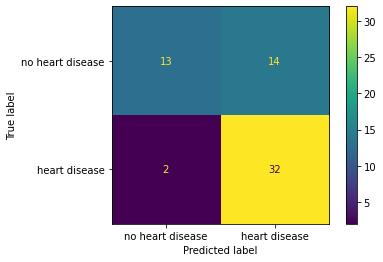

In [ ]:
from sklearn import metrics # we're using scikit-learn again

# This line counts the numbers of test examples in each correct and incorrect category. 
confusion_matrix = metrics.confusion_matrix(testing_gt, predictions)

# These two lines show the result graphically. 
display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=['no heart disease','heart disease'])
display.plot()

Among the 34 people who actually had heart disease, the decision tree correctly predicted heart disease for 28 of them. Out of the 27 people who didn't, the model was right about 20. Among the 61 examples in total that we have used for testing the decision tree, the decision tree made 13 errors. 

That's not bad overall, but the six false negatives are dangerous. Apart from making the model more accurate, there are a couple of ways to reduce the associated risk. One is to reduce the threshold for a positive prediction. This would increase the number false positives (increasing resource usage) but reduce the false negatives (reducing the risk of missing something important). Another approach would be to make the decision tree output a probability instead of a simple "yes" or "no" prediction.

An advantage of decision trees over more complex machine-learning approaches is that you can inspect them to see how they make decisions. We have made this especially practical by limiting the tree to have a depth of two - a very simple structure. Let's have a look. 

[Text(0.5, 0.8333333333333334, 'cp <= 0.5\nsamples = 242\nvalue = [111, 131]\nclass = Heart disease'),
 Text(0.25, 0.5, 'ca <= 0.5\nsamples = 117\nvalue = [84, 33]\nclass = None'),
 Text(0.125, 0.16666666666666666, 'samples = 54\nvalue = [24, 30]\nclass = Heart disease'),
 Text(0.375, 0.16666666666666666, 'samples = 63\nvalue = [60, 3]\nclass = None'),
 Text(0.75, 0.5, 'sex <= 0.5\nsamples = 125\nvalue = [27, 98]\nclass = Heart disease'),
 Text(0.625, 0.16666666666666666, 'samples = 47\nvalue = [1, 46]\nclass = Heart disease'),
 Text(0.875, 0.16666666666666666, 'samples = 78\nvalue = [26, 52]\nclass = Heart disease')]

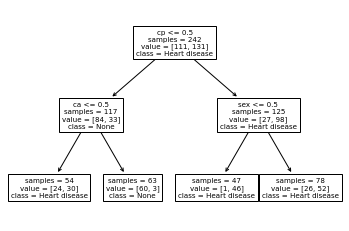

In [ ]:
from sklearn.tree import plot_tree

plot_tree(dt, class_names=('None', 'Heart disease'), feature_names=list(predictors), impurity=False)

The arrows coming from each box indicate alternate decisions based on the value of a predictor. 

`Let's look at the top box first. The top line of text in this box describes the first decision the tree makes: if the patient's angina code is 0 (no angina) the tree takes the left branch. The second line shows the number of examples at that point in the tree (the 242 training examples). The third gives the numbers in each category (111 without heart disease and 131 with). The fourth shows the majority category at that point in the tree. 

Inspecting this decision tree allows us to see exactly how it has learned to make predictions. For example, if the patient has angina, then the decision tree considers simply whether the patient is male. If so, it predicts heart disease. 

Curiously, if the patient does not have angina, then the decision tree will only predict heart disease if the max heart rate achieved in a Thallium stress test is high. Does a high max heart rate suggest heart disease? No, but all the people in this dataset have had a thallium stress test. Those with high maximum heart rates tend to be younger and healthier. The presence of this test in such a patient's chart is relevant. Inspecting the decision tree in this way can help us assess its value and its limitations. 

[TODO: discuss reporting probabilities and problem with false negatives] 

Unfortunately, there tends to be a trade-off between classifiers' scrutability and their performance. Let's consider an alternative approach that tends to be more accurate, but is not easily inspected. Specifically, we will use an ensemble of decision trees called a random forest. In a random forest, each tree is forced to be slightly different, so that its predictions do not simply repeat the predictions of other trees. The trees then vote, to produce a more accurate prediction together. 

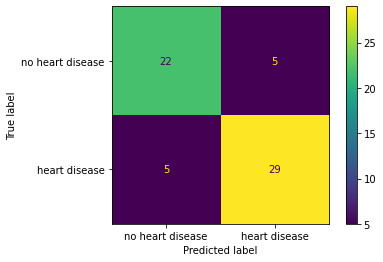

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# comment on parameters 
rf = RandomForestClassifier(n_estimators=300, max_depth=4)
rf.fit(training_p, training_gt)
predictions = rf.predict(testing_p)
confusion_matrix = metrics.confusion_matrix(predictions, testing_gt)

display = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=['no heart disease','heart disease'])
display.plot()

If you run the above code several times, you may notice that the performance is different each time. This is due to the random elements of the random forest. Sometimes the random forest does better than our simple decision tree, but not by a wide margin. To get substantially better performance, we would need more examples and/or more information about each patient. Then the more powerful random-forest method would have more to work with. 
